In [1]:
# 匯入相關套件功能
import glob
from PIL import Image
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Nifty to PNG

In [ ]:
# 找尋 Nifity 檔案
# nii_file = glob.glob("*.nii*")[-1]
# print("nii_file =", nii_file)

origin = (0.0, 0.0, 0.0)
spacing = (1.0, 1.0, 1.0)
image_arr shape = (512, 512)


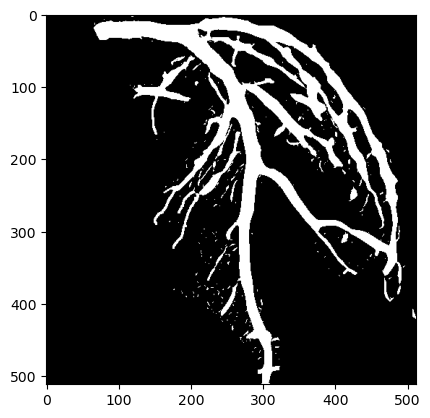

In [15]:
# 讀取 影像
filename2 = 'cases/case_02/case02_label.nii.gz'
filename3 = 'cases/case_03/case03_label.nii.gz'
filename4 = 'cases/case_04/case04_label.nii.gz'
filename5 = 'cases/case_05/case05_label.nii.gz'
filename6 = 'cases/case_06/case06_label.nii.gz'
nii_file = filename6

itk_image = sitk.ReadImage(nii_file)  # Read file
origin = itk_image.GetOrigin()
print("origin =", origin)
spacing = itk_image.GetSpacing()
print("spacing =", spacing)
image_arr = sitk.GetArrayFromImage(itk_image)[0]  # Get raw data
print("image_arr shape =", image_arr.shape)
# 繪製
plt.imshow(image_arr, cmap='gray')
plt.show()

In [14]:
# 轉存為 PNG 圖檔
out_file = nii_file.split('.')[0] + "_255.png"
image = Image.fromarray(np.uint8(image_arr * 255))
image.save(out_file, "PNG")

# PNG to Nifty

In [ ]:
# 找尋 PNG 圖檔
png_file = glob.glob("*.png")[-1]
print("png_file =", png_file)

png_file = Segmentation_8-Segment_1-label_255.png


image_arr shape = (512, 512)


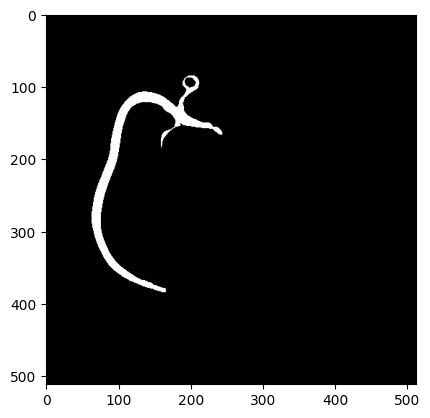

In [ ]:
# 讀取 影像
image = Image.open(png_file).convert('L')  # Read file
image_arr = np.asarray(image)
print("image_arr shape =", image_arr.shape)
# 繪製
plt.imshow(image_arr, cmap='gray')
plt.show()

In [ ]:
# 轉存為 nii.gz 檔案
itk_image = sitk.GetImageFromArray(np.uint8(image_arr[np.newaxis,:,:] > 0))
# itk_image.SetOrigin(origin)
# itk_image.SetSpacing(spacing)
out_file = png_file.replace(".png", "_.nii.gz")
sitk.WriteImage(itk_image, out_file)